In [ ]:
import torch
import numpy
import matplotlib.pyplot as plt
import pickle
import numpy as np
from optimize import optimize
from structure import Structure
from distributions import *

In [2]:
with open(f'../../steps/predicted_outputs/1z6mA02.out', 'rb') as f:
    d = pickle.load(f)

In [3]:
distogram = d['distogram'][1:, :, :]

In [4]:
x = torch.linspace(2, 22, 31)

In [5]:
distogram.shape

torch.Size([31, 61, 61])

In [6]:
fn = fit_normal(distogram)

In [7]:
fn.shape

torch.Size([3, 61, 61])

In [12]:
m, s, sc = fn[:, 5, 2]

In [13]:
m, s, sc

(tensor(6.5868), tensor(1.4179), tensor(1.5444))

In [17]:
nd = [normal_distr(i, m, s, sc) for i in x]

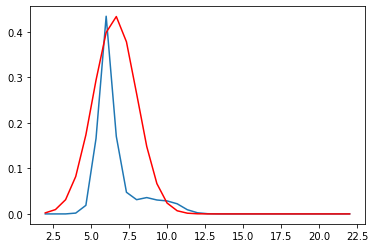

In [18]:
plt.plot(x, distogram[:, 5, 2])
plt.plot(x, nd, color='red')

In [35]:
def fit_normal(distogram):
    """
    This just calculates means and standard deviation of all histograms
    and saves it into a 3D tensor with depth 2
    """
    L = distogram.shape[1]
    params = torch.empty((2, L, L))
    
    for i in range(L):
        for j in range(L):
            m, s = calc_moments(distogram[1:, i, j])
            params[0, i, j], params[1, i, j] = m, s 
    
    return params

In [36]:
n = fit_normal(distogram)

In [40]:
n[:, 10, 2]

tensor([13.5171,  1.7328])

In [2]:
d = optimize('1z6mA02', random_state = 3, iterations=200, lr=0.01, lr_decay=0.5,
         normal=True, angle_potential=False, initial_structure=True)

Iteration 000, Loss: 9047.686
Iteration 010, Loss: 8871.761
Iteration 020, Loss: 8599.487
Iteration 030, Loss: 8633.804
Iteration 040, Loss: 8457.893
Iteration 050, Loss: 9215.256
Iteration 060, Loss: 8613.968
Iteration 070, Loss: 7875.522
Iteration 080, Loss: 7576.863
Iteration 090, Loss: 7124.336
Iteration 100, Loss: 7131.384
Iteration 110, Loss: 7283.307
Iteration 120, Loss: 7160.783
Iteration 130, Loss: 7047.126
Iteration 140, Loss: 7007.196
Iteration 150, Loss: 7026.015
Iteration 160, Loss: 7061.613
Iteration 170, Loss: 7093.932
Iteration 180, Loss: 7185.938
Iteration 190, Loss: 7228.584
Iteration 199, Loss: 7350.653


In [8]:
d = optimize('1z6mA02', random_state = 3, iterations=200, lr=0.01, lr_decay=0.5, decay_frequency=50,
         normal=True, angle_potential=False, initial_structure=True)

Iteration 000, Loss: 9047.686
Iteration 010, Loss: 8699.699
Iteration 020, Loss: 8264.229
Iteration 030, Loss: 8088.971
Iteration 040, Loss: 8265.937
Iteration 050, Loss: 8369.272
Iteration 060, Loss: 8251.837
Iteration 070, Loss: 8022.103
Iteration 080, Loss: 7870.605
Iteration 090, Loss: 7751.258
Iteration 100, Loss: 7637.283
Iteration 110, Loss: 7570.836
Iteration 120, Loss: 7525.576
Iteration 130, Loss: 7504.810
Iteration 140, Loss: 7498.565
Iteration 150, Loss: 7518.891
Iteration 160, Loss: 7539.096
Iteration 170, Loss: 7557.040
Iteration 180, Loss: 7577.513
Iteration 190, Loss: 7601.013
Iteration 199, Loss: 7624.152


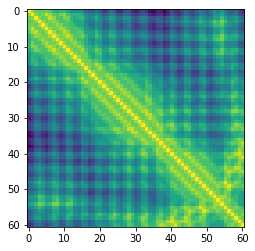

In [5]:
with torch.no_grad():
    di = d[1].G()
di += di.t()

plt.imshow(di, cmap='viridis_r')

In [10]:
d = optimize('1z6mA02', random_state = 3, iterations=200, lr=0.01, lr_decay=0.1,
         normal=True, verbose=10, angle_potential=False)

Iteration 000, Loss: 9047.675
Iteration 010, Loss: 8871.669
Iteration 020, Loss: 8596.553
Iteration 030, Loss: 8633.253
Iteration 040, Loss: 8471.446
Iteration 050, Loss: 9224.742
Iteration 060, Loss: 8624.594
Iteration 070, Loss: 7855.049
Iteration 080, Loss: 7621.947
Iteration 090, Loss: 7060.315
Iteration 100, Loss: 7031.509
Iteration 110, Loss: 7096.785
Iteration 120, Loss: 7116.693
Iteration 130, Loss: 7131.420
Iteration 140, Loss: 7136.074
Iteration 150, Loss: 7142.362
Iteration 160, Loss: 7148.857
Iteration 170, Loss: 7152.985
Iteration 180, Loss: 7132.137
Iteration 190, Loss: 7110.990
Iteration 199, Loss: 7077.683


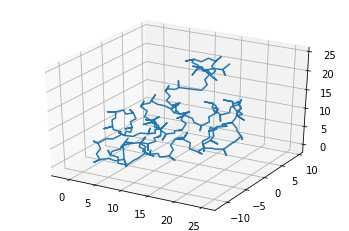

In [12]:
d[0].visualize_structure()

In [6]:
pdb = d[0].pdb_coords()

NameError: name 'd' is not defined

In [15]:
with torch.no_grad():
    dd = d[0].G()
    dd += dd.t()

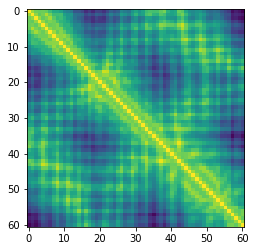

In [18]:
plt.imshow(dd, cmap='viridis_r')

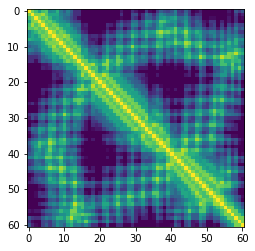

In [19]:
dm = torch.load(f'../../data/our_input/distance_maps/distance_maps32/1z6mA02.pt')
plt.imshow(dm, cmap='viridis_r')

In [4]:
s = Structure('1z6mA02', normal=True, angle_potential=False, random_state=3)

In [5]:
s.optimize(20, lr=0.001, max_iter=40)

Iteration: 000, Loss: 9047.675
61.22692608833313
Iteration: 001, Loss: 8634.055
61.01611328125
Iteration: 002, Loss: 8120.939
60.912036180496216
Iteration: 003, Loss: 8342.768
61.03284502029419
Iteration: 004, Loss: 8594.784
60.582706928253174
Iteration: 005, Loss: 8710.704
60.6521110534668
Iteration: 006, Loss: 8425.884
60.77888607978821
Iteration: 007, Loss: 8393.063


KeyboardInterrupt: 

# Hyperparameter choice

1. No learning rate decay

In [2]:
params = []
for l in [0.1, 0.05, 0.01, 0.005, 0.001]:
    for m in [0, 0.1, 0.5, 0.9]:
        params.append((l, m))

In [7]:
optimized = {}
for p in params:
    s = optimize('1z6mA02', random_state=1, iterations=200, lr=p[0], momentum=p[1], normal=True, angle_potential=False)
    optimized[f'{p}'] = s

Iteration 000, Loss: 11356.329
Iteration 010, Loss: 8676.597
Iteration 020, Loss: 8407.599
Iteration 030, Loss: 8434.059
Iteration 040, Loss: 8621.810
Iteration 050, Loss: 8876.375
Iteration 060, Loss: 8688.671
Iteration 070, Loss: 8756.458
Iteration 080, Loss: 8752.116
Iteration 090, Loss: 8474.432
Iteration 100, Loss: 7515.190
Iteration 110, Loss: 8289.418
Iteration 120, Loss: 8137.655
Iteration 130, Loss: 9244.415
Iteration 140, Loss: 9157.067
Iteration 150, Loss: 8044.952
Iteration 160, Loss: 8481.961
Iteration 170, Loss: 8607.525
Iteration 180, Loss: 9245.287
Iteration 190, Loss: 7254.496
Iteration 199, Loss: 8956.711
Iteration 000, Loss: 11356.329
Iteration 010, Loss: 8369.294
Iteration 020, Loss: 7792.930
Iteration 030, Loss: 7689.246
Iteration 040, Loss: 7777.428
Iteration 050, Loss: 7671.222
Iteration 060, Loss: 8534.204
Iteration 070, Loss: 8741.158
Iteration 080, Loss: 8081.813
Iteration 090, Loss: 8705.399
Iteration 100, Loss: 8571.698
Iteration 110, Loss: 8994.867
Iteratio

In [8]:
with open('1z6mA02_trials/1z6m_smooth_norm_11.pkl', 'wb') as f:
    pickle.dump(optimized, f)

In [3]:
optimized02 = {}
for p in params:
    s = optimize('1z6mA02', random_state=2, iterations=200, lr=p[0], momentum=p[1], normal=True, angle_potential=False)
    optimized02[f'{p}'] = s

Iteration 000, Loss: 15520.702
Iteration 010, Loss: 13701.797
Iteration 020, Loss: 11067.502
Iteration 030, Loss: 9078.770
Iteration 040, Loss: 8907.533
Iteration 050, Loss: 8354.307
Iteration 060, Loss: 8239.190
Iteration 070, Loss: 7884.095
Iteration 080, Loss: 7680.275
Iteration 090, Loss: 7664.997
Iteration 100, Loss: 7362.066
Iteration 110, Loss: 7835.285
Iteration 120, Loss: 8170.634
Iteration 130, Loss: 8648.669
Iteration 140, Loss: 9981.790
Iteration 150, Loss: 9514.639
Iteration 160, Loss: 10818.596
Iteration 170, Loss: 9562.074
Iteration 180, Loss: 8325.624
Iteration 190, Loss: 8658.604
Iteration 199, Loss: 8263.139
Iteration 000, Loss: 15520.702
Iteration 010, Loss: 13320.604
Iteration 020, Loss: 9188.773
Iteration 030, Loss: 9012.306
Iteration 040, Loss: 8270.405
Iteration 050, Loss: 8319.606
Iteration 060, Loss: 8430.397
Iteration 070, Loss: 8811.503
Iteration 080, Loss: 9851.089
Iteration 090, Loss: 8568.487
Iteration 100, Loss: 8630.612
Iteration 110, Loss: 9738.168
Iter

In [4]:
with open('1z6mA02_trials/1z6m_smooth_norm_12.pkl', 'wb') as f:
    pickle.dump(optimized02, f)

In [3]:
optimized03 = {}
for p in params:
    s = optimize('1z6mA02', random_state=3, iterations=200, lr=p[0], momentum=p[1], normal=True, angle_potential=False)
    optimized03[f'{p}'] = s

Iteration 000, Loss: 9047.678
Iteration 010, Loss: 8094.746
Iteration 020, Loss: 8716.908
Iteration 030, Loss: 9441.305
Iteration 040, Loss: 9823.543
Iteration 050, Loss: 9702.446
Iteration 060, Loss: 8977.384
Iteration 070, Loss: 8267.107
Iteration 080, Loss: 9136.926
Iteration 090, Loss: 7531.593
Iteration 100, Loss: 8897.845
Iteration 110, Loss: 8616.938
Iteration 120, Loss: 8116.549
Iteration 130, Loss: 7970.040
Iteration 140, Loss: 8050.312
Iteration 150, Loss: 7486.233
Iteration 160, Loss: 7610.006
Iteration 170, Loss: 6969.212
Iteration 180, Loss: 7879.410
Iteration 190, Loss: 8127.961
Iteration 199, Loss: 9548.288
Iteration 000, Loss: 9047.678
Iteration 010, Loss: 7014.656
Iteration 020, Loss: 9227.297
Iteration 030, Loss: 9282.198
Iteration 040, Loss: 9295.779
Iteration 050, Loss: 8458.653
Iteration 060, Loss: 8699.330
Iteration 070, Loss: 8728.904
Iteration 080, Loss: 7854.010
Iteration 090, Loss: 8486.133
Iteration 100, Loss: 9001.694
Iteration 110, Loss: 9765.697
Iteration 

In [4]:
with open('1z6mA02_trials/1z6m_smooth_norm_13.pkl', 'wb') as f:
    pickle.dump(optimized03, f)

In [14]:
optimized.keys()

dict_keys(['(0.01, 0)', '(0.01, 0.1)', '(0.01, 0.5)', '(0.01, 0.9)', '(0.005, 0)', '(0.005, 0.1)', '(0.005, 0.5)', '(0.005, 0.9)', '(0.001, 0)', '(0.001, 0.1)', '(0.001, 0.5)', '(0.001, 0.9)', '(0.0005, 0)', '(0.0005, 0.1)', '(0.0005, 0.5)', '(0.0005, 0.9)', '(0.0001, 0)', '(0.0001, 0.1)', '(0.0001, 0.5)', '(0.0001, 0.9)'])

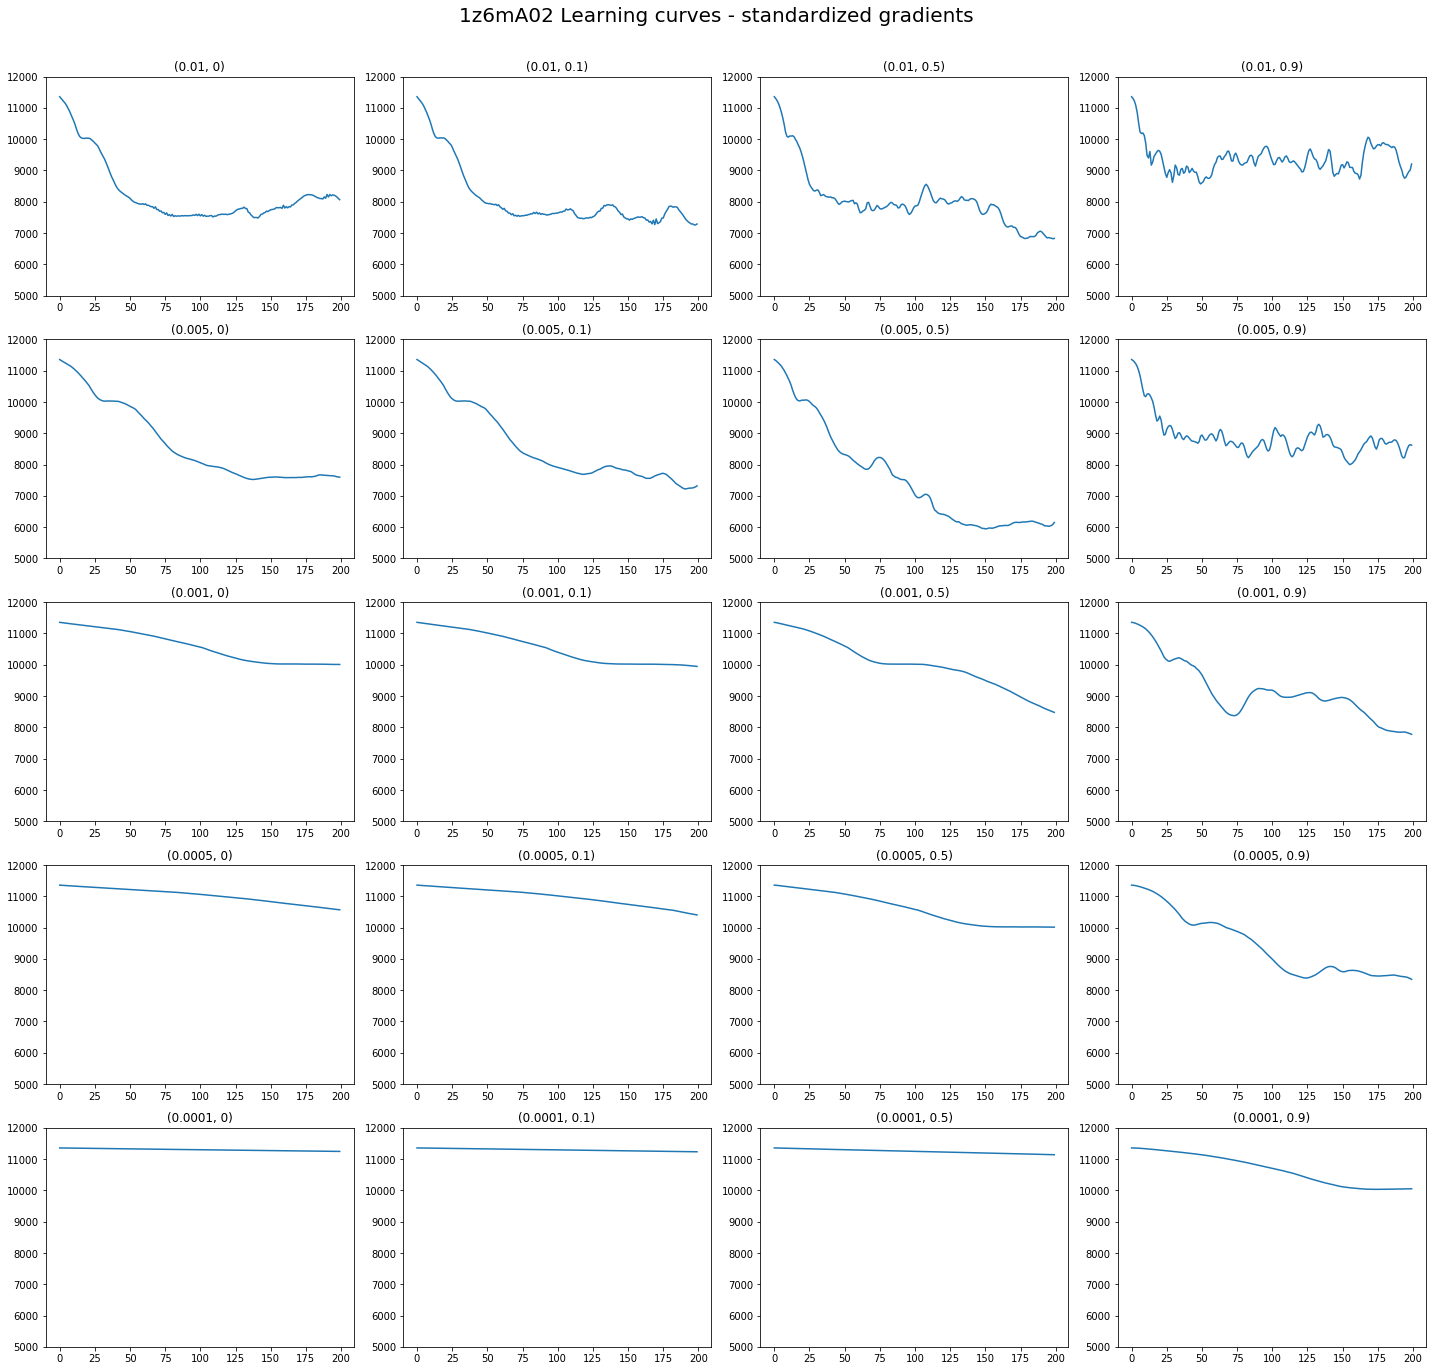

In [33]:
fig, ax = plt.subplots(5, 4, figsize=(20, 20))

for i in range(5):
    for j in range(4):
        ind = i * 4 + j
        k = list(optimized.keys())[ind]
        ax[i, j].plot(optimized[k][2][:, 0], optimized[k][2][:, 1])
        ax[i, j].set_ylim(5000, 12000)
        ax[i, j].set_title(k)

fig.suptitle('1z6mA02 Learning curves - standardized gradients', fontsize=20)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('../../plots/structure_realization/1z6m_lrcrvs_standardized.png')


In [19]:
sb = optimized['(0.005, 0.5)']

In [23]:
with torch.no_grad():
    dm = sb[0].G()

dm += dm.t()

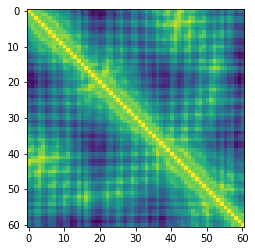

In [25]:
plt.imshow(dm, cmap='viridis_r')

In [27]:
sb[0].pdb_coords(output_dir='1z6mA02_trials/')

# Scaling of gradients between -1 and 1

In [28]:
optimized2 = {}
for p in params:
    s = optimize('1z6mA02', random_state=1, iterations=200, lr=p[0], 
                 momentum=p[1], normal=True, angle_potential=False, normalize_gradients=False,
                scale_gradients=True)
    optimized2[f'{p}'] = s

Iteration 000, Loss: 11356.329
Iteration 010, Loss: 11059.913
Iteration 020, Loss: 10592.908
Iteration 030, Loss: 9826.861
Iteration 040, Loss: 9547.249
Iteration 050, Loss: 9320.945
Iteration 060, Loss: 8920.051
Iteration 070, Loss: 8357.954
Iteration 080, Loss: 8277.599
Iteration 090, Loss: 8409.905
Iteration 100, Loss: 8477.464
Iteration 110, Loss: 8479.394
Iteration 120, Loss: 8432.771
Iteration 130, Loss: 8368.488
Iteration 140, Loss: 8326.357
Iteration 150, Loss: 8358.259
Iteration 160, Loss: 8409.510
Iteration 170, Loss: 8462.408
Iteration 180, Loss: 8462.265
Iteration 190, Loss: 8411.688
Iteration 199, Loss: 8315.165
Iteration 000, Loss: 11356.329
Iteration 010, Loss: 11022.051
Iteration 020, Loss: 10452.726
Iteration 030, Loss: 9682.854
Iteration 040, Loss: 9453.409
Iteration 050, Loss: 9067.399
Iteration 060, Loss: 8560.080
Iteration 070, Loss: 8258.395
Iteration 080, Loss: 8391.714
Iteration 090, Loss: 8481.634
Iteration 100, Loss: 8484.364
Iteration 110, Loss: 8427.710
Iter

In [ ]:
optimized22 = {}
for p in params:
    s = optimize('1z6mA02', random_state=2, iterations=200, lr=p[0], 
                 momentum=p[1], normal=True, angle_potential=False, normalize_gradients=False,
                scale_gradients=True)
    optimized22[f'{p}'] = s

In [ ]:
optimized23 = {}
for p in params:
    s = optimize('1z6mA02', random_state=3, iterations=200, lr=p[0], 
                 momentum=p[1], normal=True, angle_potential=False, normalize_gradients=False,
                scale_gradients=True)
    optimized23[f'{p}'] = s

In [35]:
with open('1z6mA02_trials/1z6m_smooth_scaled.pkl', 'wb') as f:
    pickle.dump(optimized2, f)

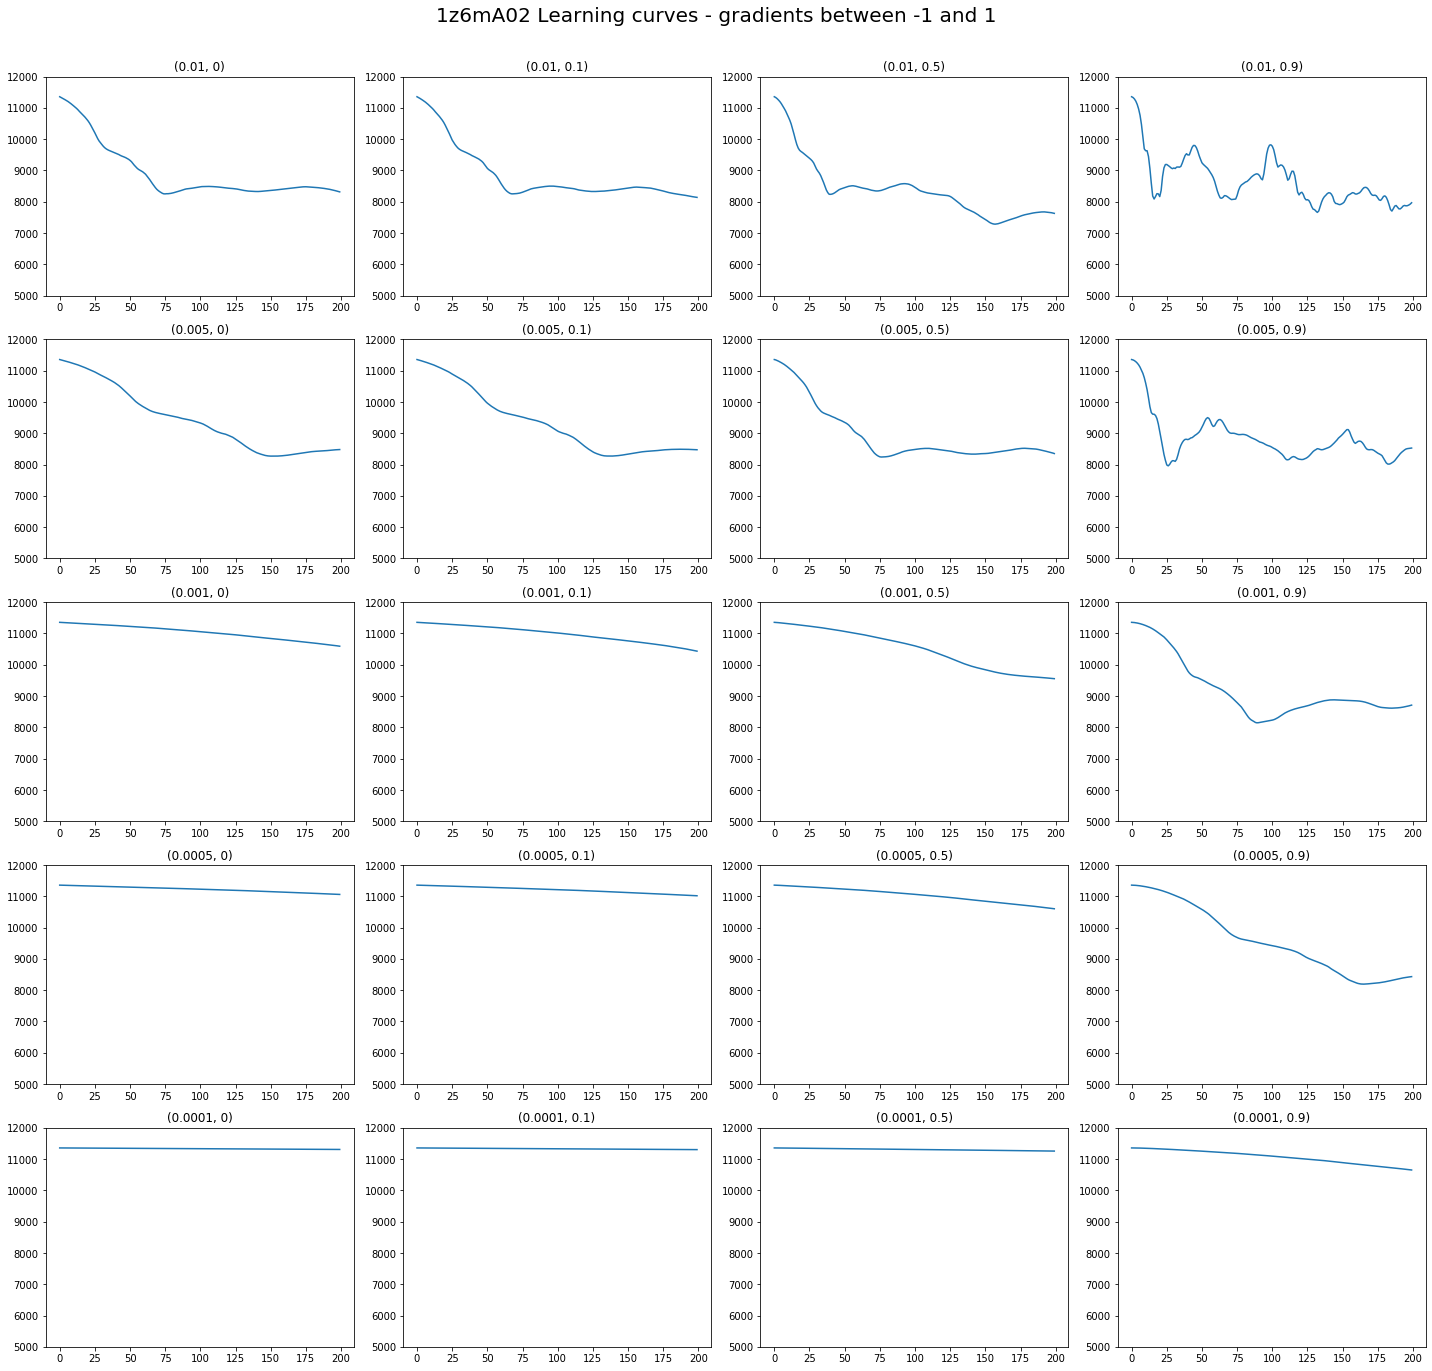

In [34]:
fig, ax = plt.subplots(5, 4, figsize=(20, 20))

for i in range(5):
    for j in range(4):
        ind = i * 4 + j
        k = list(optimized2.keys())[ind]
        ax[i, j].plot(optimized2[k][2][:, 0], optimized2[k][2][:, 1])
        ax[i, j].set_ylim(5000, 12000)
        ax[i, j].set_title(k)

fig.suptitle('1z6mA02 Learning curves - gradients between -1 and 1', fontsize=20)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('../../plots/structure_realization/1z6m_lrcrvs_scaled.png')

---

## Gradients divided by standard deviation

In [3]:
optimized3 = {}
for p in params:
    s = optimize('1z6mA02', random_state=1, iterations=200, lr=p[0], 
                 momentum=p[1], normal=True, angle_potential=False, normalize_gradients=False,
                scale_gradients=False, normalize_gradients_2=True)
    optimized3[f'{p}'] = s

Iteration 000, Loss: 11356.318
Iteration 010, Loss: 9604.864
Iteration 020, Loss: 8455.610
Iteration 030, Loss: 8466.158
Iteration 040, Loss: 8463.045
Iteration 050, Loss: 8352.980
Iteration 060, Loss: 8482.020
Iteration 070, Loss: 8236.121
Iteration 080, Loss: 8106.674
Iteration 090, Loss: 7775.839
Iteration 100, Loss: 7604.881
Iteration 110, Loss: 7445.481
Iteration 120, Loss: 7354.263
Iteration 130, Loss: 7991.125
Iteration 140, Loss: 8231.883
Iteration 150, Loss: 8246.240
Iteration 160, Loss: 8290.258
Iteration 170, Loss: 8369.046
Iteration 180, Loss: 8414.005
Iteration 190, Loss: 8541.673
Iteration 199, Loss: 8610.688
Iteration 000, Loss: 11356.318
Iteration 010, Loss: 9553.784
Iteration 020, Loss: 8247.360
Iteration 030, Loss: 8515.625
Iteration 040, Loss: 8380.659
Iteration 050, Loss: 8462.446
Iteration 060, Loss: 8399.742
Iteration 070, Loss: 8188.837
Iteration 080, Loss: 7879.132
Iteration 090, Loss: 7532.386
Iteration 100, Loss: 7693.028
Iteration 110, Loss: 7741.271
Iteratio

In [ ]:
optimized32 = {}
for p in params:
    s = optimize('1z6mA02', random_state=2, iterations=200, lr=p[0], 
                 momentum=p[1], normal=True, angle_potential=False, normalize_gradients=False,
                scale_gradients=False, normalize_gradients_2=True)
    optimized32[f'{p}'] = s

In [ ]:
optimized33 = {}
for p in params:
    s = optimize('1z6mA02', random_state=3, iterations=200, lr=p[0], 
                 momentum=p[1], normal=True, angle_potential=False, normalize_gradients=False,
                scale_gradients=False, normalize_gradients_2=True)
    optimized33[f'{p}'] = s

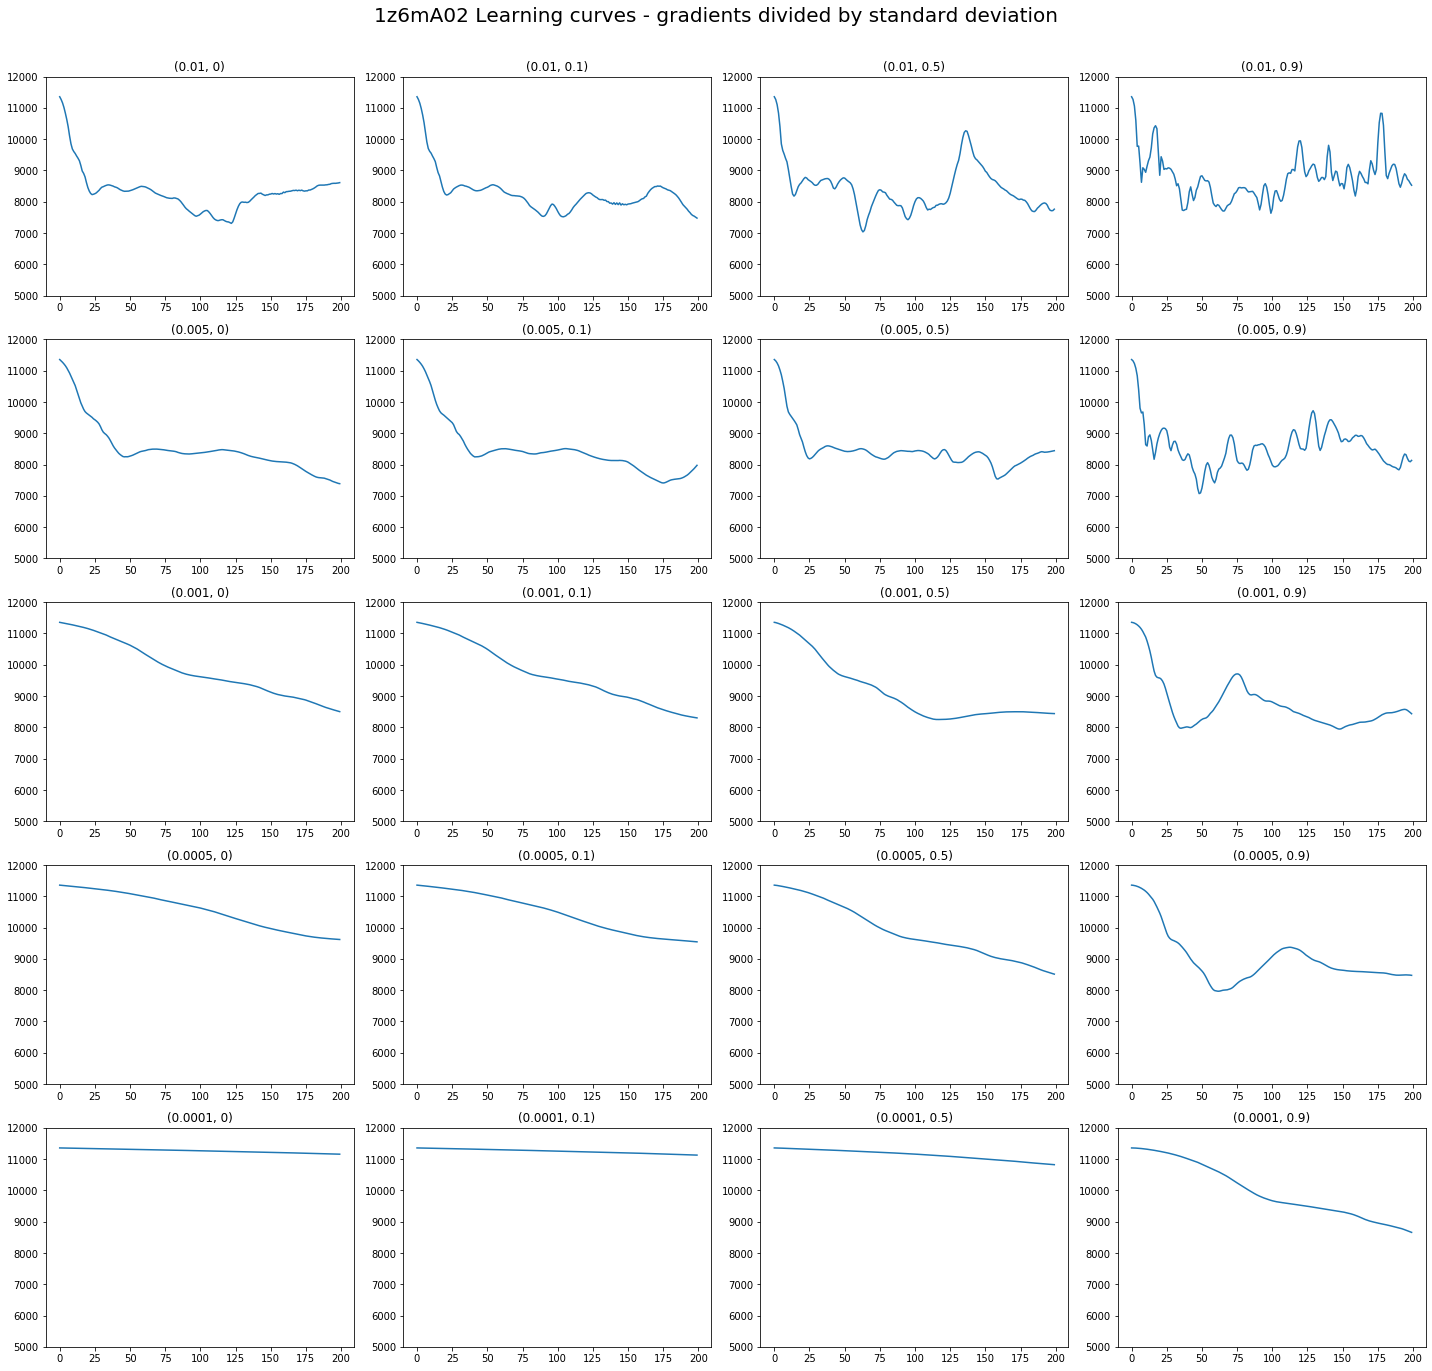

In [5]:
fig, ax = plt.subplots(5, 4, figsize=(20, 20))

for i in range(5):
    for j in range(4):
        ind = i * 4 + j
        k = list(optimized3.keys())[ind]
        ax[i, j].plot(optimized3[k][2][:, 0], optimized3[k][2][:, 1])
        ax[i, j].set_ylim(5000, 12000)
        ax[i, j].set_title(k)

fig.suptitle('1z6mA02 Learning curves - gradients divided by standard deviation', fontsize=20)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('../../plots/structure_realization/1z6m_lrcrvs_norm2.png')

---

# Several Random States + Experimentation with Standardization

In [5]:
with open('1z6mA02_trials/1z6m_smooth_norm_11.pkl', 'rb') as f:
    norm1 = pickle.load(f)
with open('1z6mA02_trials/1z6m_smooth_norm_12.pkl', 'rb') as f:
    norm2 = pickle.load(f)
with open('1z6mA02_trials/1z6m_smooth_norm_13.pkl', 'rb') as f:
    norm3 = pickle.load(f)

In [6]:
with open('1z6mA02_trials/1z6m_smooth_scaled_21.pkl', 'rb') as f:
    scaled1 = pickle.load(f)
with open('1z6mA02_trials/1z6m_smooth_scaled_22.pkl', 'rb') as f:
    scaled2 = pickle.load(f)
with open('1z6mA02_trials/1z6m_smooth_scaled_23.pkl', 'rb') as f:
    scaled3 = pickle.load(f)

In [7]:
with open('1z6mA02_trials/1z6m_smooth_standdev_31.pkl', 'rb') as f:
    sd1 = pickle.load(f)
with open('1z6mA02_trials/1z6m_smooth_standdev_32.pkl', 'rb') as f:
    sd2 = pickle.load(f)
with open('1z6mA02_trials/1z6m_smooth_standdev_33.pkl', 'rb') as f:
    sd3 = pickle.load(f)

In [3]:
s = Structure('1z6mA02', normal=True, angle_potential=False)

In [4]:
s.min_theoretical_loss

tensor(nan)

In [9]:
from distributions import normal_distr

In [25]:
l = 0
for i in range(60):
    for j in range(i, 61):
        mu, sd = s.normal_params[0, i, j], s.normal_params[1, i, j]
        print(normal_distr(mu, mu, sd))
        l -= max(torch.log(torch.tensor(0.001).item()), torch.log(normal_distr(mu, mu, sd)).item())

tensor(2.1813)


TypeError: log(): argument 'input' (position 1) must be Tensor, not float

In [22]:
l

-258.8255195916887

In [20]:
s.normal_params[:, 0, 0]

tensor([1.9997, 0.1829])

In [ ]:
def plot_lrcurves(lrdict):
    for i in range(5):
        for j in range(4):
            ind = i * 4 + j
            k = list(optimized3.keys())[ind]
            ax[i, j].plot(optimized3[k][2][:, 0], optimized3[k][2][:, 1])
            ax[i, j].set_ylim(5000, 12000)
            ax[i, j].set_title(k)

## CUBIC splines?

In [ ]:
optimized3 = {}
for p in params:
    s = optimize('1z6mA02', random_state=1, iterations=200, lr=p[0], 
                 momentum=p[1], angle_potential=False, normalize_gradients=False,
                scale_gradients=False, normalize_gradients_2=True)
    optimized3[f'{p}'] = s